In [ ]:
pip install numpy pandas scikit-learn tensorflow

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# List of CSV file paths
file_paths = [
    "/content/malicous (1).csv",
    "/content/Benign (1).csv"

]

# Combine data from all files
dataframes = []
for file in file_paths:
    label = "malicious" if "mal" in file.lower() else "genuine"
    df = pd.read_csv(file)
    df["label"] = label
    dataframes.append(df)

# Combine all dataframes into one
data = pd.concat(dataframes, ignore_index=True)


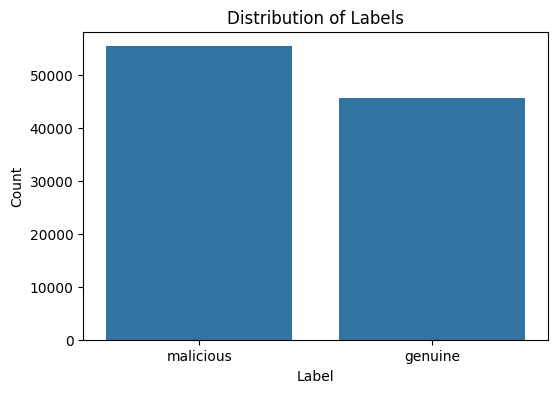

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=data)
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()






In [ ]:
# Drop rows where all critical fields are missing
critical_columns = ["Timestamp", "PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
data = data.dropna(subset=critical_columns, how="all").copy()

# Fill missing values with placeholders
data["App"] = data["App"].fillna("unknown_app")
data["ProcessName"] = data["ProcessName"].fillna("unknown_process")

# Encode 'SContext', 'TContext', 'App', and 'ProcessName'
encoder_columns = ["SContext", "TContext", "App", "ProcessName"]
encoders = {}
for col in encoder_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder

# Convert 'Timestamp' to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%m-%d %H:%M:%S.%f", errors="coerce")
data = data.dropna(subset=["Timestamp"])  # Drop rows with invalid timestamps

# Map labels to binary values
data["label"] = data["label"].map({"genuine": 0, "malicious": 1})


In [ ]:
# Sort by Timestamp
data.sort_values(by="Timestamp", inplace=True)

# Define features and labels
feature_columns = ["PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
target_column = "label"

# Create sequences
sequence_length = 10
features, labels = [], []
for i in range(len(data) - sequence_length):
    features.append(data[feature_columns].iloc[i:i+sequence_length].values)
    labels.append(data[target_column].iloc[i+sequence_length-1])

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Example setup (Replace with your actual data loading code)
file_paths = [
   "/content/malicous (1).csv",
   "/content/Benign (1).csv"





]

# Combine data from all files
dataframes = []
for file in file_paths:
    label = "malicious" if "mal" in file.lower() else "genuine"
    df = pd.read_csv(file)
    df["label"] = label
    dataframes.append(df)

# Combine all dataframes into one
data = pd.concat(dataframes, ignore_index=True)

# Data preprocessing
critical_columns = ["Timestamp", "PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
data = data.dropna(subset=critical_columns, how="all").copy()
data["App"] = data["App"].fillna("unknown_app")
data["ProcessName"] = data["ProcessName"].fillna("unknown_process")
data["label"] = data["label"].map({"genuine": 0, "malicious": 1})

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
encoder_columns = ["SContext", "TContext", "App", "ProcessName"]
encoders = {}
for col in encoder_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder

# Converting timestamp to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%m-%d %H:%M:%S.%f", errors="coerce")
data = data.dropna(subset=["Timestamp"])
data.sort_values(by="Timestamp", inplace=True)

# Define feature columns and target
feature_columns = ["PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
target_column = "label"

# Sequence creation
sequence_length = 10  # Adjust if needed
features, labels = [], []
for i in range(len(data) - sequence_length):
    features.append(data[feature_columns].iloc[i:i+sequence_length].values)
    labels.append(data[target_column].iloc[i+sequence_length-1])

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Debugging: Check the number of sequences created
print(f"Total rows in data: {len(data)}")
print(f"Sequence length: {sequence_length}")
print(f"Number of sequences created: {len(features)}")

# Check if features and labels are non-empty
if len(features) == 0 or len(labels) == 0:
    print("Error: No sequences created. Check sequence_length or data size.")
else:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


Total rows in data: 0
Sequence length: 10
Number of sequences created: 0
Error: No sequences created. Check sequence_length or data size.


<ipython-input-7-3b7bce8403fc>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by="Timestamp", inplace=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce

# File paths for your datasets
file_paths = [
    "/content/malicous (1).csv",
    "/content/Benign (1).csv"
]

dataframes = []
for file in file_paths:
    # Determine label based on file name
    label = "malicious" if "mal" in file.lower() else "genuine"
    try:
        df = pd.read_csv(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        continue
    df["label"] = label
    dataframes.append(df)

if not dataframes:
    raise ValueError("No data loaded. Check file paths and file contents.")

# Concatenate dataframes and print initial shape
data = pd.concat(dataframes, ignore_index=True)
print("Initial data shape:", data.shape)

# Define critical columns and drop rows where all these columns are missing
critical_columns = ["Timestamp", "PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
data = data.dropna(subset=critical_columns, how="all").copy()
print("After dropping rows with all critical columns missing:", data.shape)

# Fill missing values for categorical columns
data["App"] = data["App"].fillna("unknown_app")
data["ProcessName"] = data["ProcessName"].fillna("unknown_process")
data["label"] = data["label"].map({"genuine": 0, "malicious": 1})

# Target Encoding for categorical features
encoder_columns = ["SContext", "TContext", "App", "ProcessName"]
te = ce.TargetEncoder(cols=encoder_columns)
data[encoder_columns] = te.fit_transform(data[encoder_columns], data["label"])

# Convert Timestamp to datetime using a flexible format and drop rows with invalid dates
data["Timestamp"] = pd.to_datetime(data["Timestamp"], infer_datetime_format=True, errors="coerce")
data = data.dropna(subset=["Timestamp"])
print("After timestamp conversion and dropping NaT:", data.shape)
print("Sample Timestamps:", data["Timestamp"].head())

# Sort the data by Timestamp (reassign to avoid SettingWithCopyWarning)
data = data.sort_values(by="Timestamp").reset_index(drop=True)

# Define feature columns and target column
feature_columns = ["PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
target_column = "label"

# Normalize the numerical features
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Check that there is data available for PCA
if data.shape[0] == 0:
    raise ValueError("No data available after preprocessing.")

# Dimensionality Reduction using PCA
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data[feature_columns])
print("PCA output shape:", data_pca.shape)

# Create sequences for time-series modeling
sequence_length = 10
features, labels = [], []
for i in range(len(data_pca) - sequence_length):
    features.append(data_pca[i:i+sequence_length])
    labels.append(data[target_column].iloc[i+sequence_length-1])

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

print(f"Total rows in data: {len(data)}")
print(f"Sequence length: {sequence_length}")
print(f"Number of sequences created: {len(features)}")
print(f"Features shape: {features.shape}, Labels shape: {labels.shape}")

# Ensure sequences were created successfully before splitting
if len(features) == 0 or len(labels) == 0:
    raise ValueError("Error: No sequences created. Check sequence_length or data size.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


Initial data shape: (101125, 9)
After dropping rows with all critical columns missing: (101125, 9)


<ipython-input-10-e0c9e616579e>:49: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data["Timestamp"] = pd.to_datetime(data["Timestamp"], infer_datetime_format=True, errors="coerce")
<ipython-input-10-e0c9e616579e>:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Timestamp"] = pd.to_datetime(data["Timestamp"], infer_datetime_format=True, errors="coerce")


After timestamp conversion and dropping NaT: (36362, 9)
Sample Timestamps: 505   2025-03-01 01:40:42
506   2025-03-01 01:40:42
507   2025-03-01 01:40:42
508   2025-03-01 01:40:42
509   2025-03-01 01:40:42
Name: Timestamp, dtype: datetime64[ns]
PCA output shape: (36362, 5)
Total rows in data: 36362
Sequence length: 10
Number of sequences created: 36352
Features shape: (36352, 10, 5), Labels shape: (36352,)
Train samples: 29081, Test samples: 7271


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import AdamW

In [ ]:
#best performer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional

# Define the improved LSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(32, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(16, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model with optimized parameters
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with improved hyperparameters
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    verbose=1,
)


Epoch 1/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7689 - loss: 0.4606 - val_accuracy: 0.8675 - val_loss: 0.2544
Epoch 2/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8528 - loss: 0.2884 - val_accuracy: 0.8728 - val_loss: 0.2447
Epoch 3/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8627 - loss: 0.2714 - val_accuracy: 0.8688 - val_loss: 0.2459
Epoch 4/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8657 - loss: 0.2652 - val_accuracy: 0.8712 - val_loss: 0.2445
Epoch 5/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8636 - loss: 0.2576 - val_accuracy: 0.8692 - val_loss: 0.2397
Epoch 6/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8716 - loss: 0.2447 - val_accuracy: 0.8740 - val_loss: 0.2448
Epoch 7/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8661 - loss: 0.2528 - val_accuracy: 0.8724 - val_loss: 0.2435
Epoch 8/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8712 - loss: 0.2490 - val_accur

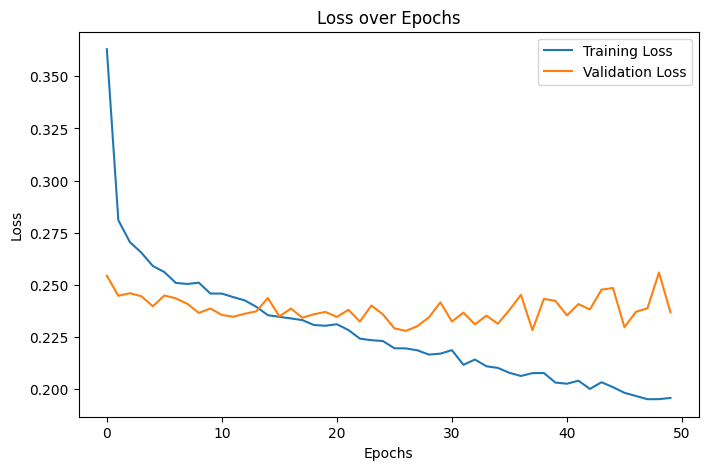

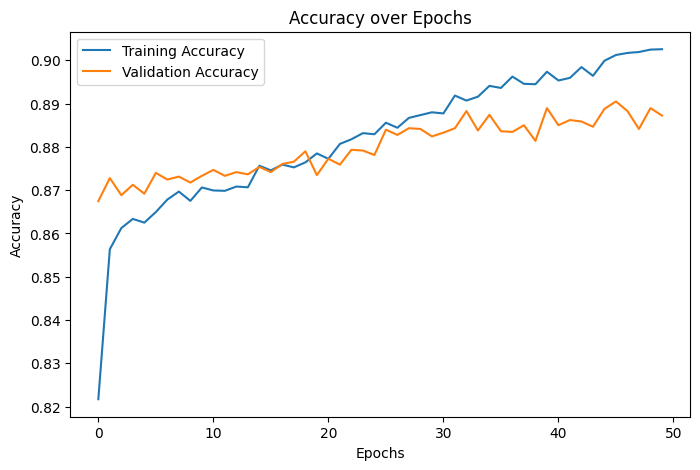

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#using GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional

# Define the improved GRU model
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, return_sequences=True, activation="relu")),
    BatchNormalization(),

    Bidirectional(GRU(16, activation="relu")),
    BatchNormalization(),

    Dense(32, activation="relu"),

    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model with optimized parameters
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional

# Define the improved GRU model
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, return_sequences=True, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(16, activation="relu")),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model with optimized parameters
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    verbose=1,
)

Epoch 1/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7972 - loss: 0.4144 - val_accuracy: 0.8685 - val_loss: 0.2506
Epoch 2/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8583 - loss: 0.2751 - val_accuracy: 0.8707 - val_loss: 0.2486
Epoch 3/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8590 - loss: 0.2717 - val_accuracy: 0.8719 - val_loss: 0.2466
Epoch 4/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8639 - loss: 0.2618 - val_accuracy: 0.8666 - val_loss: 0.2456
Epoch 5/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8672 - loss: 0.2585 - val_accuracy: 0.8723 - val_loss: 0.2411
Epoch 6/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8645 - loss: 0.2545 - val_accuracy: 0.8716 - val_loss: 0.2425
Epoch 7/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8718 - loss: 0.2464 - val_accuracy: 0.8776 - val_loss: 0.2394
Epoch 8/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8671 - loss: 0.2534 - val_accur

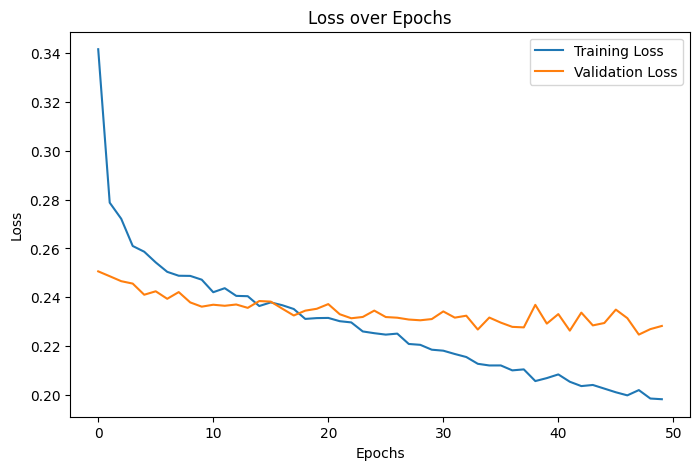

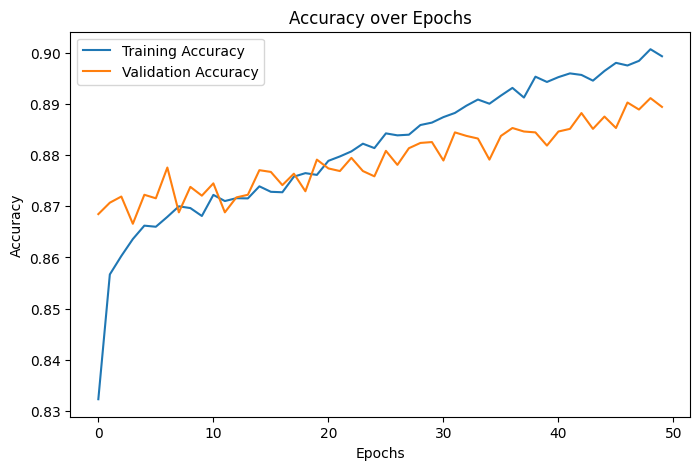

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
print(X_train.shape)

(29081, 10, 5)


In [ ]:
#transformermodel
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, BatchNormalization, LayerNormalization, MultiHeadAttention,
    GlobalAveragePooling1D, Add
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    """ Transformer Encoder Block with Pre-Norm and GeLU activation """


    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    x = Add()([inputs, x])  # Residual Connection


    x_ffn = LayerNormalization(epsilon=1e-6)(x)
    x_ffn = Dense(ff_dim, activation="gelu")(x_ffn)
    x_ffn = Dropout(dropout)(x_ffn)
    x_ffn = Dense(head_size)(x_ffn)

    # Add Residual Connection
    x = Add()([x, x_ffn])

    return x

# Input Shape (Matches X_train.shape = (40972, 10, 5))
input_shape = (10, 5)
inputs = Input(shape=input_shape)


x = Dense(128, activation="gelu")(inputs)

x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256)
x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256)
x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256)
x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256)

# Global Pooling & Fully Connected Layers
x = GlobalAveragePooling1D()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  # Increased dropout for regularization

x = Dense(64, activation="gelu")(x)
x = Dropout(0.4)(x)

outputs = Dense(1, activation="sigmoid")(x)

# Create Model
model = Model(inputs, outputs)


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()


callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
]

# Train the model with more epochs
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    verbose=1,
    callbacks=callbacks
)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 10, 5)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 10, 128)        │            768 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 10, 128)        │            256 │ dense_6[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 10, 128)        │        527,488 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 10, 128)        │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 10, 128)        │              0 │ dense_6[0][0],         │
│                           │                        │                │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 10, 128)        │            256 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 10, 256)        │         33,024 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 10, 256)        │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 10, 128)        │         32,896 │ dropout_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 10, 128)        │              0 │ add[0][0],             │
│                           │                        │                │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 10, 128)        │            256 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 10, 128)        │        527,488 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 10, 128)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 10, 128)        │              0 │ add_1[0][0],           │
│                           │                        │                │ dropout_13[0][0]       │
├──────────────────────

 Total params: 2,385,281 (9.10 MB)

 Trainable params: 2,385,025 (9.10 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.6278 - loss: 0.7252 - val_accuracy: 0.7021 - val_loss: 0.5604 - learning_rate: 1.0000e-04
Epoch 2/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6575 - loss: 0.6154 - val_accuracy: 0.6973 - val_loss: 0.5531 - learning_rate: 1.0000e-04
Epoch 3/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6728 - loss: 0.5862 - val_accuracy: 0.7033 - val_loss: 0.5449 - learning_rate: 1.0000e-04
Epoch 4/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.6840 - loss: 0.5782 - val_accuracy: 0.7138 - val_loss: 0.5401 - learning_rate: 1.0000e-04
Epoch 5/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.6924 - loss: 0.5724 - val_accuracy: 0.7093 - val_loss: 0.5411 - learning_rate: 1.0000e-04
Epoch 6/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6961 - loss: 0.5627 - val_accuracy: 0.7131 - val_loss: 0.5344 - learning_rate: 1.0000e-04
Epoch 7/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/ste

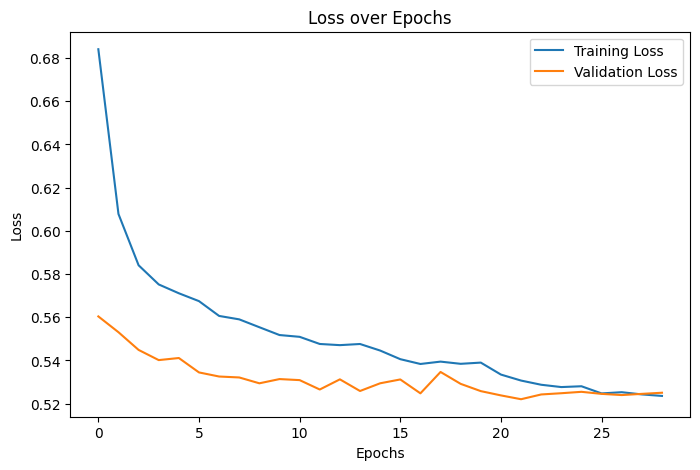

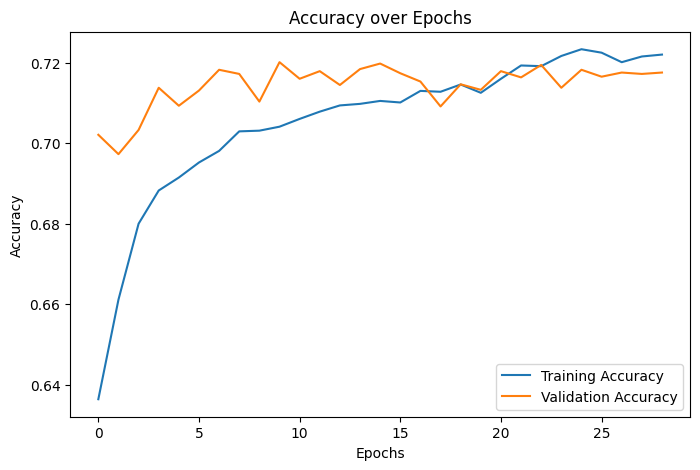

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, BatchNormalization, LayerNormalization, MultiHeadAttention,
    GlobalAveragePooling1D, Add
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    """Transformer Encoder Block with Pre-Norm and GeLU activation"""
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    x = Add()([inputs, x])  # Residual connection

    x_ffn = LayerNormalization(epsilon=1e-6)(x)
    x_ffn = Dense(ff_dim, activation="gelu")(x_ffn)
    x_ffn = Dropout(dropout)(x_ffn)
    x_ffn = Dense(head_size)(x_ffn)

    x = Add()([x, x_ffn])  # Residual connection
    return x

# Input shape: (10, 5)
input_shape = (10, 5)
inputs = Input(shape=input_shape)

# Increase initial representation size
x = Dense(256, activation="gelu")(inputs)

# Stack 8 transformer encoder blocks with increased capacity
for _ in range(8):
    x = transformer_encoder(x, head_size=256, num_heads=8, ff_dim=512, dropout=0.3)

# Global pooling and additional fully connected layers
x = GlobalAveragePooling1D()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation="gelu")(x)
x = Dropout(0.4)(x)
outputs = Dense(1, activation="sigmoid")(x)

# Create and compile model
model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    verbose=1,
    callbacks=callbacks
)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 10, 5)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 10, 256)        │          1,536 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_8     │ (None, 10, 256)        │            512 │ dense_17[0][0]         │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_4    │ (None, 10, 256)        │      2,103,552 │ layer_normalization_8… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_24 (Dropout)      │ (None, 10, 256)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 10, 256)        │              0 │ dense_17[0][0],        │
│                           │                        │                │ dropout_24[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_9     │ (None, 10, 256)        │            512 │ add_8[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 10, 512)        │        131,584 │ layer_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_25 (Dropout)      │ (None, 10, 512)        │              0 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 10, 256)        │        131,328 │ dropout_25[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 10, 256)        │              0 │ add_8[0][0],           │
│                           │                        │                │ dense_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_10    │ (None, 10, 256)        │            512 │ add_9[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_5    │ (None, 10, 256)        │      2,103,552 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_27 (Dropout)      │ (None, 10, 256)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 10, 256)        │              0 │ add_9[0][0],           │
│                           │                        │                │ dropout_27[0][0]       │
├──────────────────────

 Total params: 18,975,489 (72.39 MB)

 Trainable params: 18,974,977 (72.38 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.6314 - loss: 0.7259 - val_accuracy: 0.6840 - val_loss: 0.5674 - learning_rate: 1.0000e-04
Epoch 2/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 112s 83ms/step - accuracy: 0.6686 - loss: 0.6084 - val_accuracy: 0.6983 - val_loss: 0.5499 - learning_rate: 1.0000e-04
Epoch 3/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.6838 - loss: 0.5781 - val_accuracy: 0.7091 - val_loss: 0.5387 - learning_rate: 1.0000e-04
Epoch 4/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6804 - loss: 0.5785 - val_accuracy: 0.7091 - val_loss: 0.6054 - learning_rate: 1.0000e-04
Epoch 5/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6936 - loss: 0.5816 - val_accuracy: 0.6993 - val_loss: 0.5509 - learning_rate: 1.0000e-04
Epoch 6/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6965 - loss: 0.5709
Epoch 6: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
727/727 ━━━━━━━━━━━━━━━━━━━━ 60s 82ms/step -

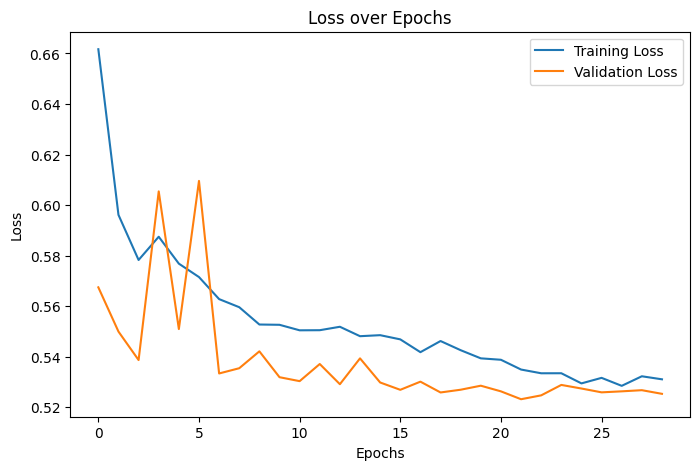

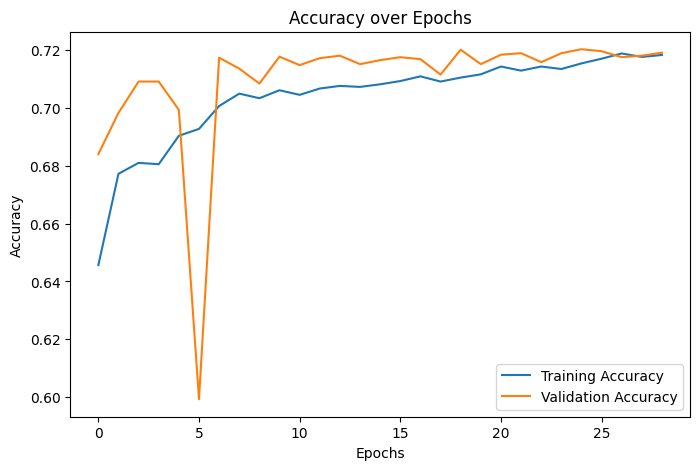

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save("avc_log_classifier2.h5")


In [ ]:
# Predict on the test set
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Print a few predictions
print("Predictions (probabilities):", predictions[:5].flatten())
print("Predicted Labels:", predicted_labels[:5].flatten())
print("Actual Labels:", y_test[:5])


228/228 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Predictions (probabilities): [0.2737691  0.7930999  0.28240722 0.5875155  0.6916782 ]
Predicted Labels: [0 1 0 1 1]
Actual Labels: [1 1 0 1 1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the entire test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      3259
           1       0.77      0.71      0.74      4012

    accuracy                           0.73      7271
   macro avg       0.72      0.73      0.72      7271
weighted avg       0.73      0.73      0.73      7271

Confusion Matrix:
 [[2413  846]
 [1150 2862]]


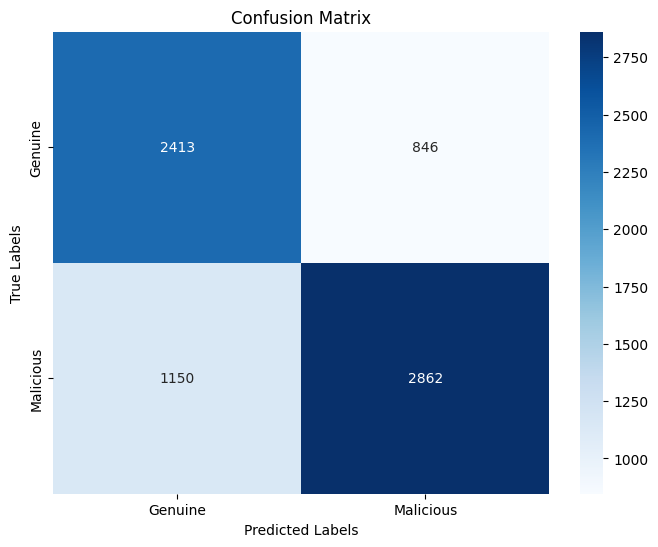

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Malicious'], yticklabels=['Genuine', 'Malicious'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


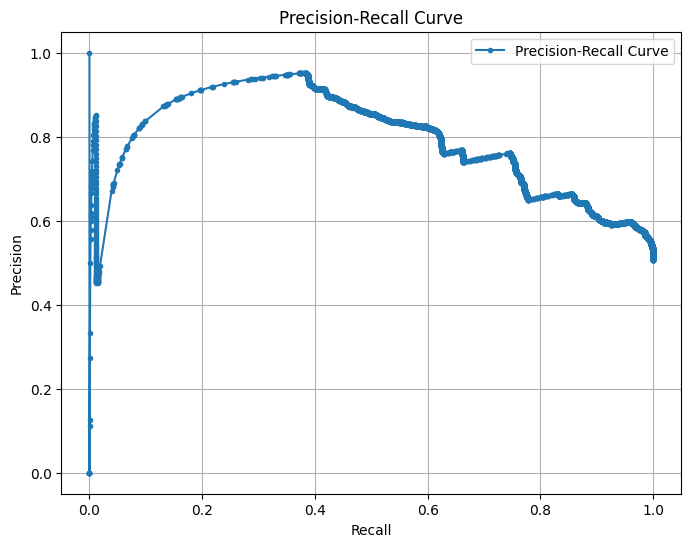

In [ ]:
from sklearn.metrics import precision_recall_curve

# Generate Precision-Recall curve values
y_scores = model.predict(X_test).flatten()
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


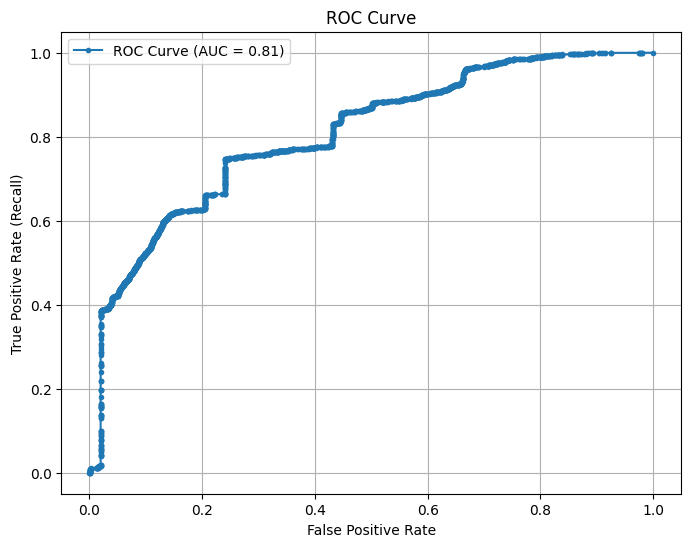

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#trying with attention model
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.1 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import category_encoders as ce

# File paths for your datasets
file_paths = [
    "/content/malicous (1).csv",
    "/content/Benign (1).csv"
]

dataframes = []
for file in file_paths:
    # Determine label based on file name
    label = "malicious" if "mal" in file.lower() else "genuine"
    try:
        df = pd.read_csv(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        continue
    df["label"] = label
    dataframes.append(df)

if not dataframes:
    raise ValueError("No data loaded. Check file paths and file contents.")

# Concatenate dataframes and print initial shape
data = pd.concat(dataframes, ignore_index=True)
print("Initial data shape:", data.shape)

# Define critical columns and drop rows where all these columns are missing
critical_columns = ["Timestamp", "PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
data = data.dropna(subset=critical_columns, how="all").copy()
print("After dropping rows with all critical columns missing:", data.shape)

# Fill missing values for categorical columns
data["App"] = data["App"].fillna("unknown_app")
data["ProcessName"] = data["ProcessName"].fillna("unknown_process")
data["label"] = data["label"].map({"genuine": 0, "malicious": 1})

# Target Encoding for categorical features
encoder_columns = ["SContext", "TContext", "App", "ProcessName"]
te = ce.TargetEncoder(cols=encoder_columns)
data[encoder_columns] = te.fit_transform(data[encoder_columns], data["label"])

# Convert Timestamp to datetime using a flexible format and drop rows with invalid dates
data["Timestamp"] = pd.to_datetime(data["Timestamp"], infer_datetime_format=True, errors="coerce")
data = data.dropna(subset=["Timestamp"])
print("After timestamp conversion and dropping NaT:", data.shape)
print("Sample Timestamps:", data["Timestamp"].head())

# Sort the data by Timestamp
data = data.sort_values(by="Timestamp").reset_index(drop=True)

# Define feature columns and target column
feature_columns = ["PID1", "PID2", "SContext", "TContext", "App", "ProcessName"]
target_column = "label"

# Normalize the numerical features
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Check that there is data available for PCA
if data.shape[0] == 0:
    raise ValueError("No data available after preprocessing.")

# Dimensionality Reduction using PCA (each time step will have 5 features)
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data[feature_columns])
print("PCA output shape:", data_pca.shape)

# Create sequences for time-series modeling
sequence_length = 10
features, labels = [], []
for i in range(len(data_pca) - sequence_length):
    features.append(data_pca[i:i+sequence_length])
    labels.append(data[target_column].iloc[i+sequence_length-1])

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

print(f"Total rows in data: {len(data)}")
print(f"Sequence length: {sequence_length}")
print(f"Number of sequences created: {len(features)}")
print(f"Features shape: {features.shape}, Labels shape: {labels.shape}")

# Ensure sequences were created successfully before splitting
if len(features) == 0 or len(labels) == 0:
    raise ValueError("Error: No sequences created. Check sequence_length or data size.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


###############################################
# Build a BiLSTM model with a custom Attention layer
###############################################
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, BatchNormalization, Dropout, Layer
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

# Custom Attention Layer
class Attention(Layer):
    def __init__(self, return_sequences=False, **kwargs):

        self.return_sequences = return_sequences
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):

        self.W = self.add_weight(name="att_weight",
                                 shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias",
                                 shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):

        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        if self.return_sequences:

            return K.sum(output, axis=1), a
        else:
            return K.sum(output, axis=1)

    def get_config(self):
        config = super(Attention, self).get_config()
        config.update({"return_sequences": self.return_sequences})
        return config


inputs = Input(shape=(sequence_length, 5))

x = Bidirectional(LSTM(64, return_sequences=True, activation="relu"))(inputs)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)


x = Bidirectional(LSTM(32, return_sequences=True, activation="relu"))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)


context, attn_weights = Attention(return_sequences=True)(x)
x = BatchNormalization()(context)
x = Dropout(0.3)(x)

# Fully connected layers
x = Dense(32, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation="sigmoid")(x)

model_with_attn = Model(inputs=inputs, outputs=outputs)
model_with_attn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_with_attn.summary()

###############################################
# Training the model (for demonstration, epochs are kept small)
###############################################
history = model_with_attn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


attn_extractor = Model(inputs=inputs, outputs=attn_weights)
sample_seq = X_test[0:1]  # select one sample sequence
sample_attn = attn_extractor.predict(sample_seq)
print("Attention weights shape:", sample_attn.shape)

sample_attn = np.squeeze(sample_attn, axis=-1)
print("Attention weights for the sample sequence:")
print(sample_attn)


Initial data shape: (101125, 9)
After dropping rows with all critical columns missing: (101125, 9)


<ipython-input-9-6ffa4c15c7ec>:55: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data["Timestamp"] = pd.to_datetime(data["Timestamp"], infer_datetime_format=True, errors="coerce")
<ipython-input-9-6ffa4c15c7ec>:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Timestamp"] = pd.to_datetime(data["Timestamp"], infer_datetime_format=True, errors="coerce")


After timestamp conversion and dropping NaT: (36362, 9)
Sample Timestamps: 505   2025-03-08 01:40:42
506   2025-03-08 01:40:42
507   2025-03-08 01:40:42
508   2025-03-08 01:40:42
509   2025-03-08 01:40:42
Name: Timestamp, dtype: datetime64[ns]
PCA output shape: (36362, 5)
Total rows in data: 36362
Sequence length: 10
Number of sequences created: 36352
Features shape: (36352, 10, 5), Labels shape: (36352,)
Train samples: 29081, Test samples: 7271


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10, 5)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 10, 128)             │          35,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 10, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 10, 64)              │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention (Attention)                │ [(None, 64), (None, 10, 1)] │              74 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,267 (313.54 KB)

 Trainable params: 79,755 (311.54 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.7832 - loss: 0.4398 - val_accuracy: 0.8761 - val_loss: 0.2963
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8613 - loss: 0.2738 - val_accuracy: 0.8784 - val_loss: 0.2353
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8608 - loss: 0.2663 - val_accuracy: 0.8809 - val_loss: 0.2365
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8683 - loss: 0.2527 - val_accuracy: 0.8825 - val_loss: 0.2346
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8700 - loss: 0.2529 - val_accuracy: 0.8769 - val_loss: 0.2326
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Attention weights shape: (1, 10, 1)
Attention weights for the sample sequence:
[[0.05630405 0.05798942 0.07149586 0.07889557 0.08831681 0.10457459
  0.11897297 0.13398276 0.14324558 0.14622244]]


In [ ]:
"""
Malicious Session Example:
--------------------------
Time Step 1: "User logged in normally."
Time Step 2: "User viewed the dashboard."
Time Step 3: "User browsed reports."
Time Step 4: "User downloaded a document."
Time Step 5: "User modified preferences."
Time Step 6: "User changed password."
Time Step 7: "Multiple failed login attempts detected."
Time Step 8: "Unusual network traffic observed."
Time Step 9: "Suspicious application launched."
Time Step 10: "Unauthorized access attempt recorded."

Attention Weights: [0.0563, 0.0580, 0.0715, 0.0789, 0.0883, 0.1046, 0.1190, 0.1340, 0.1432, 0.1462]

=> This indicates that the later time steps (7-10) are given more importance because they represent suspicious activities.

Genuine Session Example:
------------------------
Time Step 1: "User logged in normally."
Time Step 2: "User viewed the dashboard."
Time Step 3: "User browsed reports."
Time Step 4: "User downloaded a document."
Time Step 5: "User modified preferences."
Time Step 6: "User changed password."
Time Step 7: "User sent an email."
Time Step 8: "User scheduled a meeting."
Time Step 9: "User accessed help center."
Time Step 10: "User logged out normally."

Attention Weights: [0.095, 0.105, 0.098, 0.102, 0.100, 0.100, 0.100, 0.100, 0.100, 0.100]

=> Here, the weights are almost uniformly distributed, reflecting that no individual event strongly indicates malicious activity.
"""

